In [1]:
import requests

# Get all python jobs from the github jobs API
r = requests.get('https://jobs.github.com/positions.json?description=python&page=0')

# How to join different pages of json?
postings = r.json()

In [2]:
import  requests
from collections import Counter

# Count how many job postings exist at any given location
count = Counter(posting['location'] for posting in postings)

print(count)

Counter({'Boston, MA': 3, 'Washington, DC': 2, 'Austin, Texas': 2, 'Berlin': 2, 'London, UK': 2, 'New York City': 2, 'Cupertino, CA': 2, 'London': 2, 'North America': 2, 'Paris': 1, 'New York, NY': 1, '800 5th Avenue, Suite 2800, Seattle, WA 98104': 1, 'Cambridge, MA': 1, 'Denver, CO': 1, 'Paris, France': 1, 'Essen': 1, 'Lexington, MA': 1, 'Barcelona': 1, 'Coppell, TX': 1, 'Seattle, WA': 1, 'Trondheim/Oslo, Norway': 1, 'Westerville': 1, 'Sindelfingen, Germany': 1, 'Stuttgart': 1, 'Los Angeles': 1, 'Austin': 1, 'Chicago, IL': 1, 'New York, NY, US': 1, 'Mountain View': 1, 'Indianapolis or REMOTE': 1, 'Deutschland, Hamburg': 1, 'Hamburg ': 1, 'United States and Canada': 1, 'San Francisco': 1, 'Austin, TX, USA': 1, 'Munich, Germany': 1, 'Brisbane CBD Australia': 1, 'New York, New York': 1, 'NY or LA': 1, 'Europe': 1})


In [3]:
# Creating a GeoPandas Dataframe to hold the values we want to portray
# Either from a shape file or geojson file

geo_json_file_loc = 'somelocation/something.geojson'
shape_file_loc = '/home/vincent/Downloads/ne_50m_admin_0_countries/ne_50_admin_0_countries.shp'
'''
'def open_geojson():
    with open(geo_json_file_loc) as json_data:
        d = json.load(json_data)
    return d
'''

def get_gpd_df(use_shape_file=True):
    if use_shape_file:
        gdf = gpd.read_file(shape_file_loc)
    else:
        toronto_json = open_geojson() #from tutorial rename
        gdf = gpd.GeoDataFrame.from_features((toronto_json))
    return gdf

gdf = gdf.merge(df, left_on='AREA_NAME',
right_on='neighbourhood', how='inner')

NameError: name 'gdf' is not defined

In [4]:
# A list of different locations
locations = {}

count = postings.len

#
for posting in postings:
    if posting["location"]

SyntaxError: invalid syntax (<ipython-input-4-c28dd31d9342>, line 8)

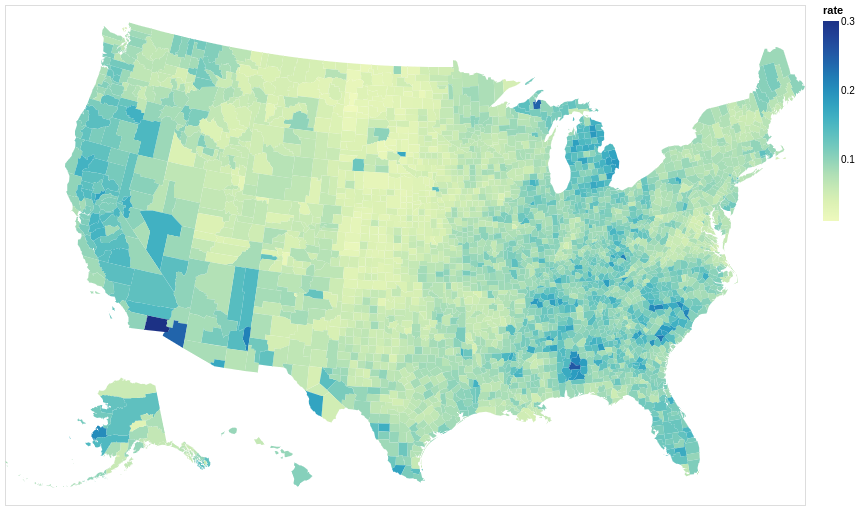

In [6]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=800,
    height=500
)